In [1]:
import sys
sys.path.append('../src')
import tensorflow as tf
import tensorflow.keras as k
import pandas as pd
import numpy as np
import test_submit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plt_norm(s, n=1):
    mean = s.mean()
    std = s.std()
    s[(s < mean + n*std) & (s > mean - n*std)].hist(bins=60)
    plt.show()

In [3]:
train = pd.read_pickle('../inputs/dataset/train.pkl')

In [4]:
train[['target', 'investment_id', 'time_id']].describe()

,target,investment_id,time_id
count,3.141410e+06,3.141410e+06,3.141410e+06
mean,NaN,1.885265e+03,6.654862e+02
std,0.000000e+00,1.083616e+03,3.560434e+02
min,-9.421875e+00,0.000000e+00,0.000000e+00
25%,-5.004883e-01,9.520000e+02,3.530000e+02
50%,-9.716797e-02,1.882000e+03,7.040000e+02
75%,3.571777e-01,2.830000e+03,9.750000e+02
max,1.203906e+01,3.773000e+03,1.219000e+03


有的项目数据多，有的少

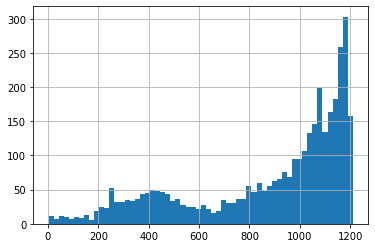

In [5]:
train.groupby('investment_id').time_id.count().hist(bins=60)
plt.show()

均值整体在0

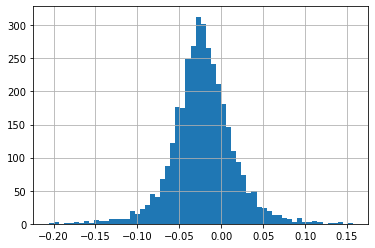

mean -0.0231 std 0.04636


In [6]:
plt.show()
plt_norm(train.groupby('investment_id').target.mean(), 4)
print('mean', train.groupby('investment_id').target.mean().mean(), 'std', train.groupby('investment_id').target.mean().std())

Text(45.0, 0.5, 'mean target')

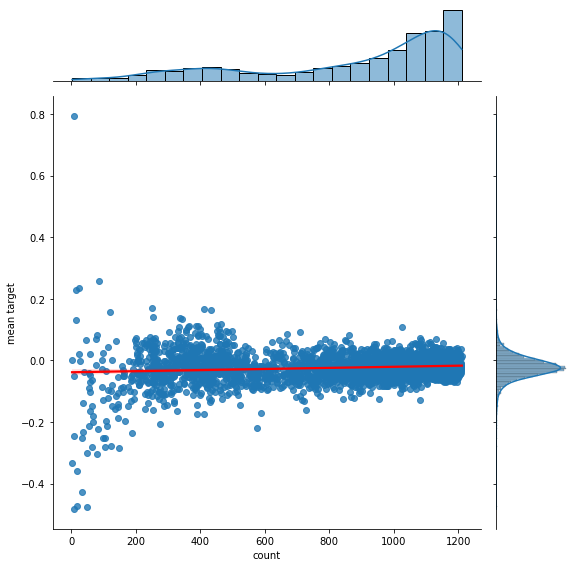

In [14]:
ax = sns.jointplot(y=train.groupby('investment_id').target.mean(), x=train.groupby('investment_id').time_id.count(), height=8, kind='reg', joint_kws={'line_kws': {'color':'red'}})
ax.ax_joint.set_xlabel('count')
ax.ax_joint.set_ylabel('mean target')

In [7]:
train.groupby('investment_id').target.mean()

investment_id
0       0.052826
1      -0.025681
2      -0.051117
3       0.046753
4      -0.047760
          ...   
3768   -0.027145
3769   -0.028931
3770   -0.072998
3772   -0.013977
3773   -0.015839
Name: target, Length: 3579, dtype: float16